# Sentiment Analysis - Logistic Regression

- typically we consider sentiment analysis as a classification task,
- there can be two or more categories: positive vs negative or positive/very positive/ negative/ neutral...

- Interesting in recommender systems, when we deal with ratings for moveies, hotels etc, we treat them in regression analysis, why not here? why we treat with classification in sentiment analysis?
- adam bana kalsa ben regression'a sokarım diyo

### usefulness of sentiment analysis:
- reputation management looking at social media
- you wanna automatically read reviews at fb, tweets, post about your company
- you can pass it to analyzer to report sentiment statistics
- take action basec on it
- you may also wonder sentiments on your competitor
- deciding response based on customer's sentiment

## Logistic Regression
- Naive bayes was a model built on probability
- logistic regression is based on vectors
- Terminology: w1* x1 + w2 * x2 + b = 0 
- w1 & w2 are called weights
- b is called bias
- logistic regression can be thought as a neuron, which is the basic building block of NN
- Generalize: Activation a(x) = 0 on the line
- a(x) > 0 ; one side of the line
- a(x) < 0 ; the other side of the line
- denklemi eşit sayıyla çarptığında sonuç değişmez ve aynı çizgidir which means an infitite number of weights and biases can represent the same boundary

- a much more compact way to write for multidimensional 
- a(x) = ∑ wi * xi + b  i: 1'den D'ye. or a(x) =  w^T * x + b
- since there must be a w for every component x, w is also a vector size of D.
- hence wi * xi is a dot product w^T is the transpose of w-vector.

#### so far we described a generic linear classifier:
- what makes it logistic regression ? - logistic function !
- logistic regression aka Sigmoid function
- ö(x) = 1 / (1 + exp(-x)) when input is infinit, ö approaches to 1, when to -infinity; approaches to zero
- hence output always btw zero and one
- it wallows us to interpret the output as a probabiltiy
- p(y=1|x) = ö(w^T * x + b)
- why care about probs?
- compute metrics like AUC, even sample from this distribution (common for NNs)
- Decision rule: prediction rounds 0.5'dan, 0.5 da ikisi de olbailir genelde bire yuvarlanır

### Modifying the threshold:
- remember: ROC is formed by tracing out TPR / FPR ratio.
- separating boundary is 50% but we can change our threshold
- e.g. 30% => more true positives but more false positives as well
- or if you have too mny false positives => increase the threshold

### Compare Logistic Regression with Naive Bayes
- Generative vs Discriminative Models
- Logistic : directly models p(y|x) this is what we call discriminative (nalaka? it discriminates btw different classes of y directly
- Naive Bayes: models p(x|y) , indirectly models p(y|x) it's genertive bcz once we have p(x|y) we can actually generate samples from that distribution
- kulağa saçma gerekebikir why would I wanna generate X?
- let's thşnk concreete example, image recognition, X is image and y is label to recognze
- if we model is x|y, we can generate random images from a given class
- one modern example of generating samples is GANs (given the class cat generates the image of cat) #class galiba burda kategori anlamında
- or state-of-art generative models for images
- çok anlamadım yaa...


## Multiclass Logistic Regression
- other names: Multinomial Logistic Regression, Maximum Entropy Classifier
- relevant for the dataset we'll be looking at
- suppose we have K classes (again kategori), then there will be K weight vectors (each of which are a D-size vector)
- suppose we also have K bias
- then we can write K activation functions that gives us a1, a2... aK
- The Softmax function: softmax(aK) = exp(aK) / ∑ exp(aj) for j = 1...K
- Interpretation: p(y=1|x) = softmax(ak)
- Sigmoid function is for the binary case while softmax is for multiclass case, it converts activation function into a probability distribiuton in the multiclass case

#### Model Output:
- for each of our N samples we get K probs that sum to 1
- overall output is a matrix NxK
- also what we get when we call model.predict_proba() in sklearn
- what if we want actual class predictions instead of probabilities?
- Take the argmax over all probabilities for a given sample, yields a 1-d array of class labels for each k sample
- burda sample'dan kasıt ne

#### Bence bunu daha iyi anlatan video vardır.



### interpret the weights in a binary case
- one advantage of logistic regression is it's very easy to interpret once you have the model weights and biases
- assumption: all input features X are non-negtaive (easy yo meet in NLP since they're word counts)
- the other cases these interprets still apply but consider in negative
- let's think w1 is positive and large; makes the activation larger
- şöyle düşün a(x) > 0 ise output'u 1'e yaklaştırıyo ve x positif iken büyük bi weight sonucun sıfırı geçmesini kolaylaştrır, outputu bire yakalştırma hikayresini tam anlamı:
- sigmoid functionın solunda x -sonsuza fonksiyon sıfıra yaklaşıyo, sağında ise aktivasyon büyüdükçe maksimum değeri bire yaklaşıyo
- large positive weights corresponf to large positive influence on output being 1.
- large negative weights bring activation down, closer to negative infinity, correspond to large negtive influence on output being zero, if the magnitude of this weight small, smaller than the positive one, will have less an effect
#### magnitude and sign of weight both matter
A positive weight tells us a larger value of input feature is correlated to a positive class
A negative weight tells us a larger value of input feature is correlated to a negative class
A weight of large magnitude says this input matters a lot in predicting the output vşce versa
- eee multiple output class varsa annem ? 

### Multiclass case:
- interpretation largely the same, just seem more compl, since we've more wirght and they sprt of interact with each other due to the softmax
- Interpret the weights as MATRIX
- all weights are D-length vectors, w1 to wK D sanırım number of inputs
- stacking them yields DxK matrix, i.e. a(x) = W^T x + b (tek modelde gösterimi) W bahsi geçen matrix ; D rows olduğu için transpozsinde X ile multiply edilebilir mantıklı
- if W[d,k] is large and positive, it will make the kth activation more positvie (by a large amount) ,  neden çünkü çarpma işlemi sırasında xd ile çaprılıp kth output'un toplamına contribute edecek,
- anlaadıysan lineer algebra çarpma yöntemini hatırla: çarpımın sonucu k-rows 1 column matrix çıkacak, kth rowdaki her data, wk sütunundaki weightlerin Xlerle çarpımının toplamı
#### Interpetation: Input feature d has a positive correlation with the output being K, magitude matters in pretty mıch same way (73.ders)

## Exercise Prompt : My solution
- dataset : tweets, positive, negative and neutral
- build a classifier , test-train split, measure accuracy on both sets
- comes with irrelevant columsn
### Details:
- decide your vectorization strategy
- options: tokenization, lemmatization, normalization
- use logistic regression
- check class imbalance, use appropriate metrics (AUC or F1)
- plot confusion matrix
- AUC n F1 are not designed for multiclass problems but sklearn has a way to make them work

### further instructions: 
- build another classifier binary positive and negaitve only
- this will greatly improve results makes sense since neutral class is in between, we're likely to confuse neutral with neighborsing classes
- interpret the weights by printing out words with most corresponding positive and negative weights

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import nltk #kirill'de bunla yaptık
from nltk.stem.porter import PorterStemmer #kirill
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#bu dersin hocası Multinomial kullanıyo :/
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score #kirill

In [2]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-06-13 23:43:04--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: 'AirlineTweets.csv'

AirlineTweets.csv   100%[===================>]   3.26M  13.0MB/s    in 0.3s    

2023-06-13 23:43:08 (13.0 MB/s) - 'AirlineTweets.csv' saved [3421431/3421431]



In [3]:
df = pd.read_csv('AirlineTweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df = df[["airline_sentiment", "text"]]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [29]:
labels = df["airline_sentiment"]
texts = df["text"]

<AxesSubplot:>

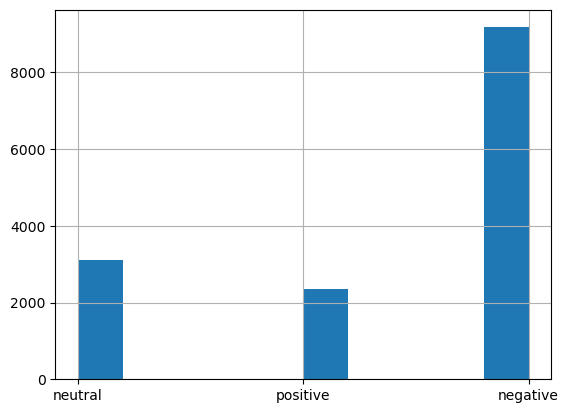

In [40]:
labels.hist()

In [33]:
texts_train, texts_test, Y_train, Y_test = train_test_split(texts,labels)

In [34]:
texts_train

3474     @united I did not.  That's why I am VERY conce...
12922    @AmericanAir yes, it says it should be deliver...
10737    @USAirways @AmericanAir terminal E in Miami is...
13899    @AmericanAir I'm willing to hold for an agent....
2995             @united good fly!! #United #businessFirst
                               ...                        
14246    @AmericanAir my flight has been delayed &amp; ...
12854    @AmericanAir We've sent you more info via DM. ...
13830    @AmericanAir how nice it would be if you had h...
2668     @united my flight landed 50 min, but we are be...
11281    @USAirways : i have been trying to reach divid...
Name: text, Length: 10980, dtype: object

In [35]:
type(texts_train)

pandas.core.series.Series

In [36]:
## with word_tokenize:

vectorizer = CountVectorizer(tokenizer = word_tokenize)
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

print("train score:", classifier.score(X_train, Y_train))
print("test score:", classifier.score(X_test, Y_test))

train score: 0.9622040072859745
test score: 0.812568306010929


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
classifier = LogisticRegression(max_iter = 500)
classifier.fit(X_train, Y_train)

print("train score:", classifier.score(X_train, Y_train))
print("test score:", classifier.score(X_test, Y_test))

Ptrain = classifier.predict(X_train)
Ptest = classifier.predict(X_test)
print("train F1:", f1_score(Y_train, Ptrain, labels = labels, average = "weighted"))
print("test F1:", f1_score(Y_test, Ptest, labels = labels, average = "weighted"))

Prob_train = classifier.predict_proba(X_train)[:,1]
Prob_test = classifier.predict_proba(X_test)[:,1]
print("train AUC:", roc_auc_score(Y_train, Prob_train, multi_class = "ovr"))
print("test AUC:", roc_auc_score(Y_test, Prob_test, multi_class = "ovr"))

train score: 0.9570127504553734
test score: 0.8002732240437158
train F1: 0.966641923221443
test F1: 0.842713438465106


AxisError: axis 1 is out of bounds for array of dimension 1

#### ValueError: multi_class must be in ('ovo', 'ovr')
- the One-vs-Rest scheme compares each class against all the others (assumed as one);
- the One-vs-One scheme compares every unique pairwise combination of classes.

In [47]:
cm = confusion_matrix(Y_train, Ptrain)
cm

array([[6787,   90,   22],
       [ 193, 2067,   60],
       [  56,   51, 1654]])

In [48]:
cm_test = confusion_matrix(Y_test, Ptest)
cm_test

array([[2041,  172,   66],
       [ 243,  471,   65],
       [  97,   88,  417]])

In [49]:
# with countvectorizer:

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

classifier = LogisticRegression(max_iter = 500)
classifier.fit(X_train, Y_train)

print("train score:", classifier.score(X_train, Y_train))
print("test score:", classifier.score(X_test, Y_test))

Ptrain = classifier.predict(X_train)
Ptest = classifier.predict(X_test)
print("train F1:", f1_score(Y_train, Ptrain, labels = labels, average = "weighted"))
print("test F1:", f1_score(Y_test, Ptest, labels = labels, average = "weighted"))

train score: 0.9570127504553734
test score: 0.8002732240437158
train F1: 0.966641923221443
test F1: 0.842713438465106


In [50]:
# with stopwords:

vectorizer = CountVectorizer(stop_words = "english")
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

classifier = LogisticRegression(max_iter = 500)
classifier.fit(X_train, Y_train)

print("train score:", classifier.score(X_train, Y_train))
print("test score:", classifier.score(X_test, Y_test))

Ptrain = classifier.predict(X_train)
Ptest = classifier.predict(X_test)
print("train F1:", f1_score(Y_train, Ptrain, labels = labels, average = "weighted"))
print("test F1:", f1_score(Y_test, Ptest, labels = labels, average = "weighted"))

train score: 0.9456284153005464
test score: 0.7724043715846994
train F1: 0.9578416805400891
test F1: 0.8188515258228682


In [52]:
#tfidf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000)
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

classifier = LogisticRegression(max_iter = 500)
classifier.fit(X_train, Y_train)

print("train score:", classifier.score(X_train, Y_train))
print("test score:", classifier.score(X_test, Y_test))

Ptrain = classifier.predict(X_train)
Ptest = classifier.predict(X_test)
print("train F1:", f1_score(Y_train, Ptrain, labels = labels, average = "weighted"))
print("test F1:", f1_score(Y_test, Ptest, labels = labels, average = "weighted"))

train score: 0.8538251366120219
test score: 0.7989071038251366
train F1: 0.8835273657651912
test F1: 0.8390259978958184


In [ ]:
#bi boka benzemiyo sanki :D